# GR 5243 Project: "The Colors of Happiness"

In a world brimming with diverse experiences, happiness often emerges in various hues. Our dataset, a collection of moments described in text and categorized into seven types of happiness, serves as a prism through which we can observe these colors. From achievements to nature’s embrace, each category reflects a unique shade of joy.

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
df = pd.read_csv('/Users/zhengfeichen/Desktop/Columbia/5243/ads-spring2024-project1-czhfei123/data/cleaned_hm.csv')
df.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


We just want "cleaned_hm" and "predicted_category"

In [247]:
df = df[['cleaned_hm', 'predicted_category']]
df.head()

,cleaned_hm,predicted_category
0,I went on a successful date with someone I fel...,affection
1,I was happy when my son got 90% marks in his e...,affection
2,I went to the gym this morning and did yoga.,exercise
3,We had a serious talk with some friends of our...,bonding
4,I went with grandchildren to butterfly display...,affection


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   cleaned_hm          100535 non-null  object
 1   predicted_category  100535 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [249]:
df.predicted_category.value_counts()

predicted_category
affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: count, dtype: int64

In [256]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def lemma_sentence(review):
    lemmatizer = WordNetLemmatizer()
    token_words = word_tokenize(review)
    lemmatize_sentence = [lemmatizer.lemmatize(word) for word in token_words] 
    return " ".join(lemmatize_sentence)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhengfeichen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhengfeichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengfeichen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [257]:
from nltk.corpus import stopwords
def remove_stopwords(review):
    tokens = word_tokenize(review)
    stop = stopwords.words('english')
    filtered_tokens = [word for word in tokens if word.lower() not in stop] 
    return ' '.join(filtered_tokens)

## 1. The Solitude and Symphony of 'Enjoying the Moment'

Our first exploration ventures into the realm of 'enjoy the moment' happiness. Here, we ask: does this joy stem more from within ourselves or from the people around us? Analyzing the textual descriptions, we look for patterns of solitary enjoyment versus shared experiences. Are these moments often described in serene, personal settings like reading a book in a quiet room, or do they involve interactions, like laughing heartily with friends over dinner? This analysis not only uncovers the source of joy in these moments but also paints a picture of how individuals find contentment in the hustle of life.

In [258]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

etm_df = df[df.predicted_category == 'enjoy_the_moment']
etm_df

,cleaned_hm,predicted_category
8,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,enjoy_the_moment
14,Hearing Songs It can be nearly impossible to g...,enjoy_the_moment
23,There are two types of people in the world: th...,enjoy_the_moment
45,I cooked and ate a wonderful sausage and chees...,enjoy_the_moment
51,The phone that I have ordered in a local onlin...,enjoy_the_moment
...,...,...
100515,I had pizza for dinner and it was great,enjoy_the_moment
100520,I had a little time to myself in the afternoon.,enjoy_the_moment
100521,"I worked out, which always makes me feel good.",enjoy_the_moment
100527,I am fond of seeing cricket match. Yesterday t...,enjoy_the_moment


In [259]:
text = " ".join(review for review in etm_df.cleaned_hm)

In [260]:
text = remove_stopwords(text)
text = lemma_sentence(text)

In [261]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp.max_length = 1300000
doc = nlp(text)

filtered_text = ' '.join(token.text for token in doc if token.pos_ == 'NOUN')

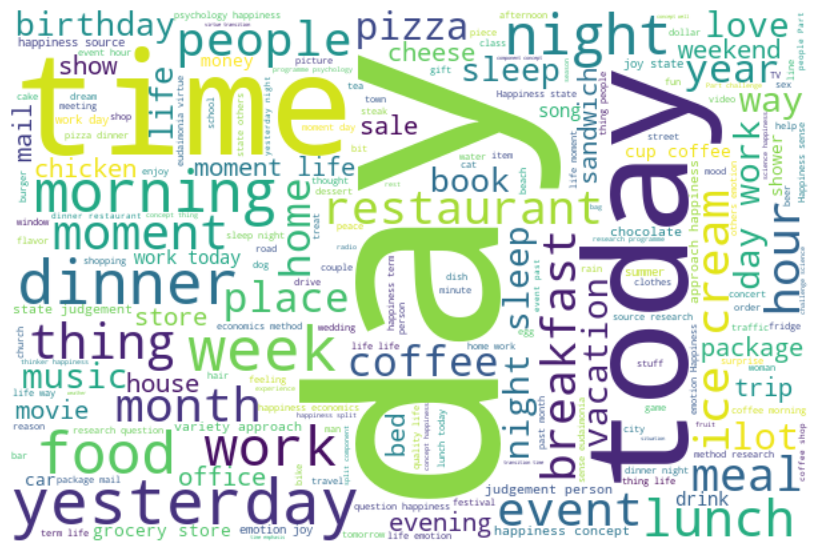

In [262]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'white'
).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [263]:
cleaned_text = filtered_text.replace("week", "")
cleaned_text = cleaned_text.replace("time", "")
cleaned_text = cleaned_text.replace("day", "")
cleaned_text = cleaned_text.replace("month", "")
cleaned_text = cleaned_text.replace("moment", "")
cleaned_text = cleaned_text.replace("morning", "")
cleaned_text = cleaned_text.replace("yesterday", "")
cleaned_text = cleaned_text.replace("today", "")

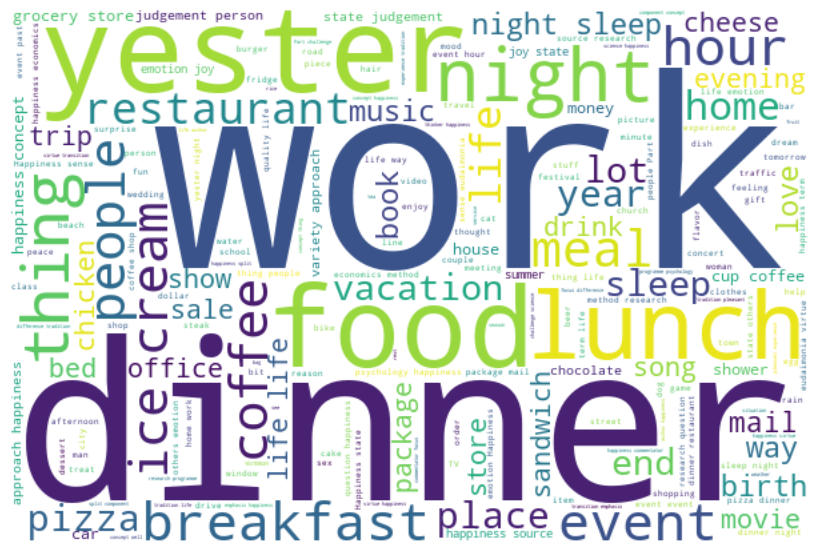

In [264]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'white'
).generate(cleaned_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

 We see "work", "dinner", "lunch", "food", "breakfast", "sleep", "coffee" become the most frequent words.It seems like we cannot infer whether our joy is from ourselves or from others. However, in this cloud map, we don't see any other frequent words including other people. For example, If we have lunch or dinner with friends, we don't see word "friends". If we work with other, we don't see word "collegues" or "coworker". In this way, we reasonably infer that our happy moment is alone.

## 2. Bonding Bliss: The Who and What of Shared Happiness

We know that "enjoy the moment" is always along now. So we turn to explore the 'bonding' category to see our happy moment with others, seeking to understand who we bond with and what activities foster this connection. Are these moments of bonding more frequently described with family, friends, or perhaps colleagues? And what are the activities – is it sharing meals, engaging in group hobbies, or embarking on joint adventures? By delving into the details of these shared experiences, we not only uncover the dynamics of relational happiness but also offer insights into how bonds are strengthened in joyous moments.

In [265]:
bond_df = df[df.predicted_category == 'bonding']
bond_df.head()

,cleaned_hm,predicted_category
3,We had a serious talk with some friends of our...,bonding
12,went to movies with my friends it was fun,bonding
16,I helped my neighbour to fix their car damages.,bonding
18,A hot kiss with my girl friend last night made...,bonding
35,We were competing against another team in a on...,bonding


In [266]:
text = " ".join(review for review in bond_df.cleaned_hm)
text = remove_stopwords(text)
text = lemma_sentence(text)

In [267]:
doc = nlp(text)
filtered_text = ' '.join(token.text for token in doc if token.pos_ == 'NOUN')

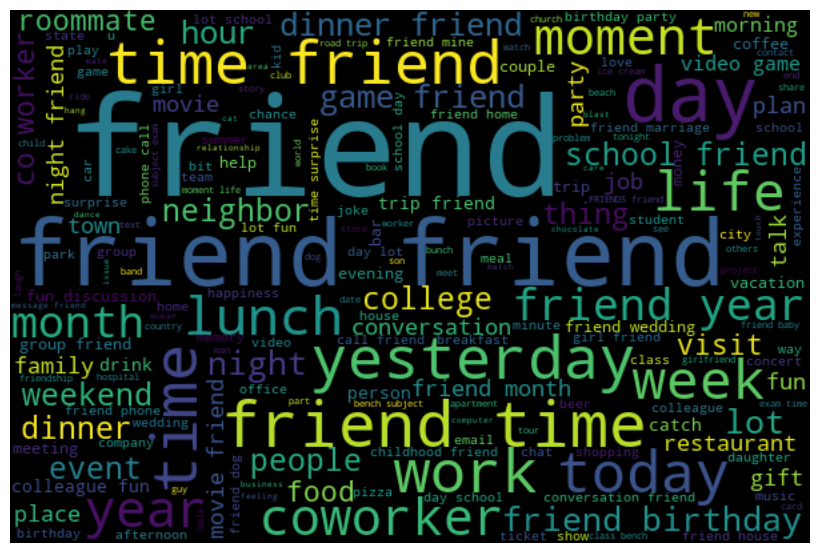

In [268]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'black'
).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [269]:
cleaned_text = filtered_text.replace("today", "")
cleaned_text = cleaned_text.replace("yesterday", "")
cleaned_text = cleaned_text.replace("month", "")
cleaned_text = cleaned_text.replace("week", "")
cleaned_text = cleaned_text.replace("time", "")
cleaned_text = cleaned_text.replace("yead", "")
cleaned_text = cleaned_text.replace("day", "")
cleaned_text = cleaned_text.replace("time", "")

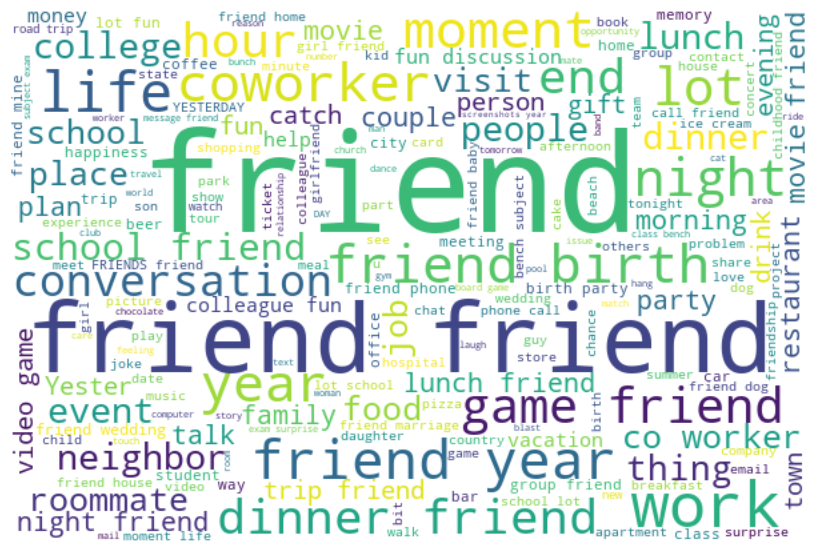

In [281]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'white'
).generate(cleaned_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We see that "friend", "friends" becomes the most frequent words. If we take a close look, we can also see "roommate", "neighbor", "coworker", "couple" and so on, which means they are the people shared our happiness. And about the activities: we see "college", "school", "conversation", "birth", "restuarant" in this cloud, which can help us to reasonably infer that the happiness occurs at school, college, or restaurant, through conversation, or at some friends' birthday. 

## 3. The Euphoria of Exercise: What Sports Lift Us the Most?

So back to another activity we get happiness usually alone , we turning to the 'exercise' category, we dive into a question that resonates with many: which sports bring the most happiness? By examining the frequency and context of different sports mentioned in our dataset, we can identify not just the most popular activities, but also the emotional undertones that accompany them. Is it the exhilarating rush of a basketball game, the tranquil rhythm of a morning jog, or the adventurous spirit of hiking that elevates the spirits of many? This analysis offers a fresh perspective on the link between physical activity and emotional well-being.

In [271]:
exe_df = df[df.predicted_category == 'exercise']
exe_df.head()

,cleaned_hm,predicted_category
2,I went to the gym this morning and did yoga.,exercise
11,I completed my 5 miles run without break. It m...,exercise
77,Going for some running and exercising after th...,exercise
88,After taking some off at the gym(due to illnes...,exercise
96,I went to sports club and did running and exer...,exercise


In [272]:
text = " ".join(review for review in exe_df.cleaned_hm)
text = remove_stopwords(text)
text = lemma_sentence(text)

In [273]:
doc = nlp(text)
filtered_text = ' '.join(token.text for token in doc if token.pos_ == 'NOUN' or token.pos_ == 'VERB')

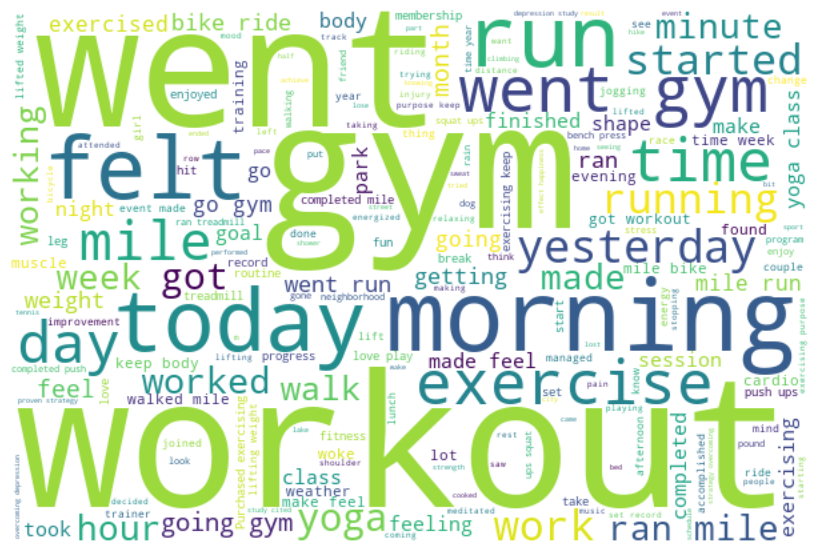

In [285]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'white'
).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [283]:
cleaned_text = filtered_text.replace("morning", "")
cleaned_text = cleaned_text.replace("yesterday", "")
cleaned_text = cleaned_text.replace("today", "")
cleaned_text = cleaned_text.replace("month", "")
cleaned_text = cleaned_text.replace("week", "")
cleaned_text = cleaned_text.replace("time", "")
cleaned_text = cleaned_text.replace("day", "")
cleaned_text = cleaned_text.replace("felt", "")
cleaned_text = cleaned_text.replace("went", "")

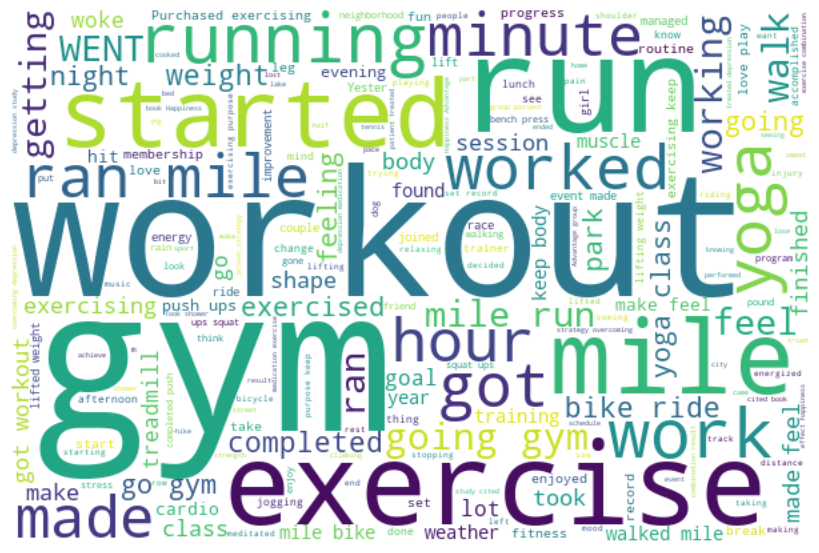

In [286]:
wordcloud = WordCloud(
    width = 600, 
    height = 400, 
    background_color = 'white'
).generate(cleaned_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

We can see: "gym", "exercise", "workout", "running", "yoga" and so on are most frequent word. In this way, we can conclude that these exercises make people happy more frequently.

All above, we use the size of the word cloud to check the frequency of the words to do analysis and get our result, it should be correct. But how to truly quantify the importance of words in each category to validate our result? To answer that, we can try to make a machine learning model and visualize our result: the word importance

## 4. Build a model to predict the category accurately
1. In this way we can use this model to predict the category of future sentences
2. We can find the high-related words in each category

In [287]:
# Use stem first
X_stem = df.cleaned_hm.apply(lemma_sentence) 

In [288]:
y = df.predicted_category
y

0                affection
1                affection
2                 exercise
3                  bonding
4                affection
                ...       
100530           affection
100531    enjoy_the_moment
100532           affection
100533             bonding
100534            exercise
Name: predicted_category, Length: 100535, dtype: object

In [289]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'achievement': 0,
 'affection': 1,
 'bonding': 2,
 'enjoy_the_moment': 3,
 'exercise': 4,
 'leisure': 5,
 'nature': 6}

In [290]:
X_stem = X_stem.apply(remove_stopwords)

In [291]:
X_stem

0         went successful date someone felt sympathy con...
1                    wa happy son got 90 % mark examination
2                                   went gym morning yoga .
3         serious talk friend flaky lately . understood ...
4         went grandchild butterfly display Crohn Conser...
                                ...                        
100530     husband announced getting decent bonus quarter .
100531                                        Pepsi drink .
100532                     Cuddling girlfriend last night .
100533    great meeting yesterday work bos colleague wen...
100534                           great workout last night .
Name: cleaned_hm, Length: 100535, dtype: object

In [292]:
from sklearn.model_selection import train_test_split
X_dev, X_test, y_dev, y_test = train_test_split(X_stem, y, test_size=0.2, random_state=42)

### TF-IDF first

In [293]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

tfidf_vectorizer = TfidfVectorizer()
X_dev = tfidf_vectorizer.fit_transform(X_dev)
X_test = tfidf_vectorizer.transform(X_test)
smote = SMOTE(random_state=14)
X_smote, y_smote = smote.fit_resample(X_dev, y_dev)


In [294]:
# Ensure it's not balanced
pd.Series(y_smote).value_counts()

1    27400
0    27400
5    27400
6    27400
2    27400
3    27400
4    27400
Name: count, dtype: int64

#### Logistic model

In [295]:
from sklearn.linear_model import LogisticRegressionCV
logit_model = LogisticRegressionCV().fit(X_smote, y_smote)
logit_model.score(X_test, y_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

0.896851842641866

In [296]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = logit_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.896851842641866
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6905
           1       0.95      0.92      0.94      6768
           2       0.95      0.94      0.94      2236
           3       0.74      0.82      0.78      2165
           4       0.79      0.91      0.85       225
           5       0.79      0.84      0.81      1461
           6       0.80      0.88      0.83       347

    accuracy                           0.90     20107
   macro avg       0.85      0.89      0.87     20107
weighted avg       0.90      0.90      0.90     20107



#### Random Forest Model

In [298]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_smote, y_smote)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8526881185656736
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6905
           1       0.93      0.89      0.91      6768
           2       0.92      0.92      0.92      2236
           3       0.70      0.66      0.68      2165
           4       0.72      0.90      0.80       225
           5       0.71      0.78      0.75      1461
           6       0.62      0.84      0.71       347

    accuracy                           0.85     20107
   macro avg       0.78      0.84      0.80     20107
weighted avg       0.86      0.85      0.85     20107



#### XGBoost Model

In [299]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_smote, y_smote)
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8516934400954891
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6905
           1       0.95      0.90      0.92      6768
           2       0.93      0.94      0.93      2236
           3       0.66      0.69      0.67      2165
           4       0.70      0.88      0.78       225
           5       0.70      0.78      0.74      1461
           6       0.64      0.79      0.71       347

    accuracy                           0.85     20107
   macro avg       0.78      0.83      0.80     20107
weighted avg       0.86      0.85      0.85     20107



#### Grid Search the best hyperparamters
We find that logistic model has the best performance, so we do a grid search to find the best hyperparamters

In [301]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 15, 20, 25, 30],
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_smote, y_smote)
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   3.2s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   3.3s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   3.4s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   3.5s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   4.5s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.3s
[CV] END ...............C=0.01, penalty=l2, sol

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 5.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 5.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 5.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 5.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 5.5min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   9.3s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   8.8s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   8.5s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   6.2s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   7.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   7.7s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   5.7s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   6.2s
[CV] END ......................C=10, penalty=l2, solver=saga; total time=   6.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   3.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   4.4s
[CV] END ...................

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=24.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=25.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=27.0min
[CV] END .................C=15, penalty=l1, solver=liblinear; total time=  10.4s
[CV] END .................C=15, penalty=l1, solver=liblinear; total time=   9.6s
[CV] END .................C=15, penalty=l1, solver=liblinear; total time=   9.7s
[CV] END .................C=15, penalty=l1, solver=liblinear; total time=   9.6s
[CV] END .................C=15, penalty=l1, solver=liblinear; total time=   9.7s
[CV] END ......................C=15, penalty=l2, solver=saga; total time=   7.6s
[CV] END ......................C=15, penalty=l2, solver=saga; total time=   7.9s
[CV] END ......................C=15, penalty=l2, solver=saga; total time=   7.7s
[CV] END ......................C=15, penalty=l2, solver=saga; total time=   7.9s
[CV] END ......................C=15, penalty=l2, solver=saga; total time=   8.5s
[CV] END .................C=15, penalty=l2, solver=liblinear; total time=   3.9s
[CV] END .................C=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=27.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=27.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=15, penalty=l1, solver=saga; total time=30.0min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=15, penalty=l1, solver=saga; total time=32.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=15, penalty=l1, solver=saga; total time=33.5min
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=  10.8s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=  10.2s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=  10.2s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=  10.7s
[CV] END .................C=20, penalty=l1, solver=liblinear; total time=  10.7s
[CV] END ......................C=20, penalty=l2, solver=saga; total time=   8.6s
[CV] END ......................C=20, penalty=l2, solver=saga; total time=   8.8s
[CV] END ......................C=20, penalty=l2, solver=saga; total time=   9.4s
[CV] END ......................C=20, penalty=l2, solver=saga; total time=   9.7s
[CV] END ......................C=20, penalty=l2, solver=saga; total time=   9.7s
[CV] END .................C=20, penalty=l2, solver=liblinear; total time=   4.5s
[CV] END .................C=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=15, penalty=l1, solver=saga; total time=34.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=15, penalty=l1, solver=saga; total time=34.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=35.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=36.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=38.3min
[CV] END .................C=25, penalty=l1, solver=liblinear; total time=  10.5s
[CV] END .................C=25, penalty=l1, solver=liblinear; total time=  10.6s
[CV] END .................C=25, penalty=l1, solver=liblinear; total time=  10.6s
[CV] END .................C=25, penalty=l1, solver=liblinear; total time=  10.3s
[CV] END .................C=25, penalty=l1, solver=liblinear; total time=  10.3s
[CV] END ......................C=25, penalty=l2, solver=saga; total time=   9.4s
[CV] END ......................C=25, penalty=l2, solver=saga; total time=   9.7s
[CV] END ......................C=25, penalty=l2, solver=saga; total time=   9.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l2, solver=saga; total time=  10.3s
[CV] END ......................C=25, penalty=l2, solver=saga; total time=   9.0s
[CV] END .................C=25, penalty=l2, solver=liblinear; total time=   4.2s
[CV] END .................C=25, penalty=l2, solver=liblinear; total time=   4.6s
[CV] END .................C=25, penalty=l2, solver=liblinear; total time=   4.7s
[CV] END .................C=25, penalty=l2, solver=liblinear; total time=   5.0s
[CV] END .................C=25, penalty=l2, solver=liblinear; total time=   4.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=38.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=38.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l1, solver=saga; total time=38.1min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l1, solver=saga; total time=39.8min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l1, solver=saga; total time=41.4min
[CV] END .................C=30, penalty=l1, solver=liblinear; total time=  12.0s
[CV] END .................C=30, penalty=l1, solver=liblinear; total time=  11.8s
[CV] END .................C=30, penalty=l1, solver=liblinear; total time=  11.7s
[CV] END .................C=30, penalty=l1, solver=liblinear; total time=  11.5s
[CV] END .................C=30, penalty=l1, solver=liblinear; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l2, solver=saga; total time=  11.6s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l2, solver=saga; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l2, solver=saga; total time=  10.7s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l2, solver=saga; total time=  15.5s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l2, solver=saga; total time=  10.5s
[CV] END .................C=30, penalty=l2, solver=liblinear; total time=   4.1s
[CV] END .................C=30, penalty=l2, solver=liblinear; total time=   4.5s
[CV] END .................C=30, penalty=l2, solver=liblinear; total time=   5.0s
[CV] END .................C=30, penalty=l2, solver=liblinear; total time=   4.8s
[CV] END .................C=30, penalty=l2, solver=liblinear; total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l1, solver=saga; total time=59.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=25, penalty=l1, solver=saga; total time=86.3min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l1, solver=saga; total time=85.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l1, solver=saga; total time=87.2min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l1, solver=saga; total time=88.5min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l1, solver=saga; total time=87.9min


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=30, penalty=l1, solver=saga; total time=84.9min
Best parameters found:  {'C': 25, 'penalty': 'l2', 'solver': 'saga'}
Best score found:  0.964509906152242


In [302]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8954095588600984
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      6905
           1       0.95      0.92      0.94      6768
           2       0.94      0.94      0.94      2236
           3       0.74      0.82      0.78      2165
           4       0.80      0.90      0.85       225
           5       0.79      0.84      0.81      1461
           6       0.80      0.87      0.83       347

    accuracy                           0.90     20107
   macro avg       0.85      0.88      0.86     20107
weighted avg       0.90      0.90      0.90     20107



In [303]:
index_to_class_name = {v: k for k, v in label_mapping.items()}
index_to_class_name

{0: 'achievement',
 1: 'affection',
 2: 'bonding',
 3: 'enjoy_the_moment',
 4: 'exercise',
 5: 'leisure',
 6: 'nature'}

In [304]:
a = lemma_sentence("I go to gym today and it makes me happy")
a = remove_stopwords(a)
a_token = tfidf_vectorizer.transform([a])
a_token
a_pred = best_model.predict(a_token)
a_pred

array([4])

In [305]:
b = lemma_sentence("I got all A score this semester and I'm happy'")
b = remove_stopwords(b)
b_token = tfidf_vectorizer.transform([b])
b_token
b_pred = best_model.predict(b_token)
b_pred

array([0])

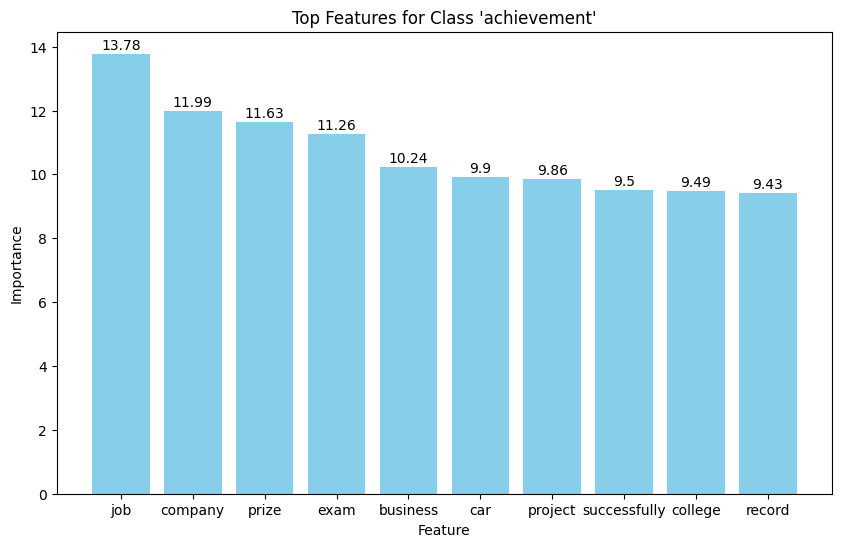

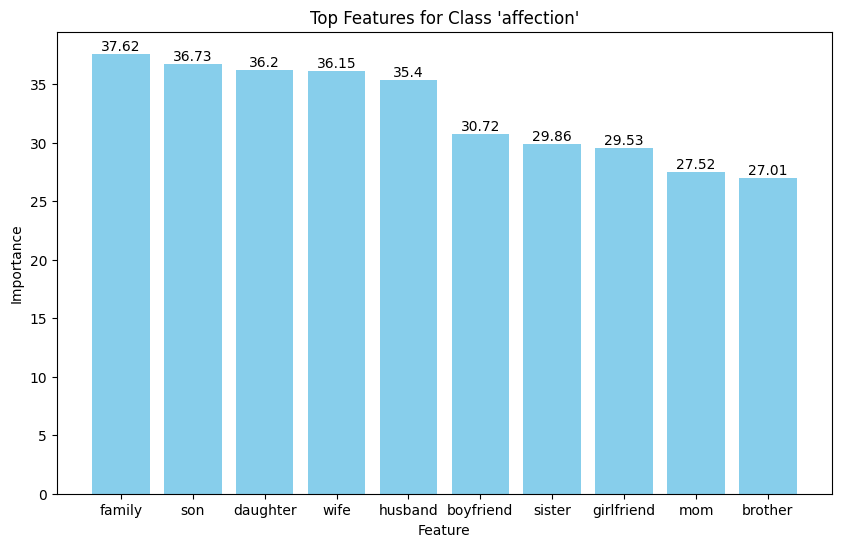

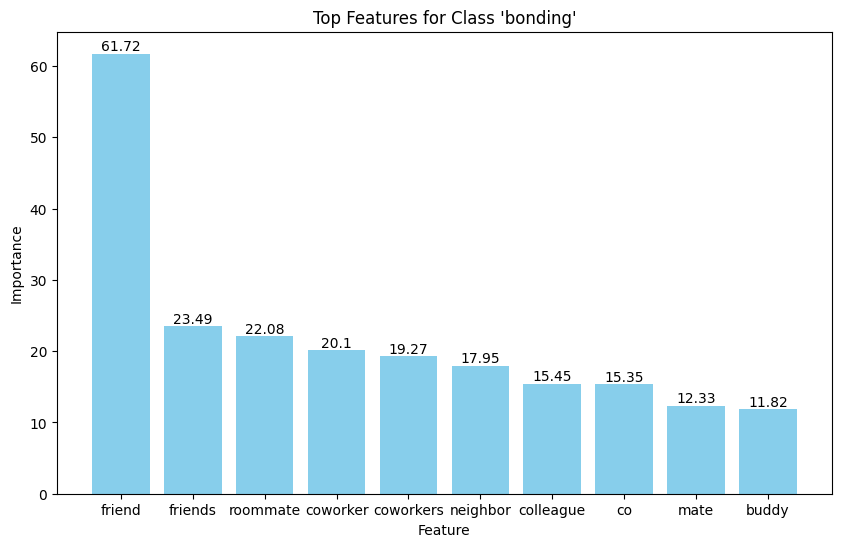

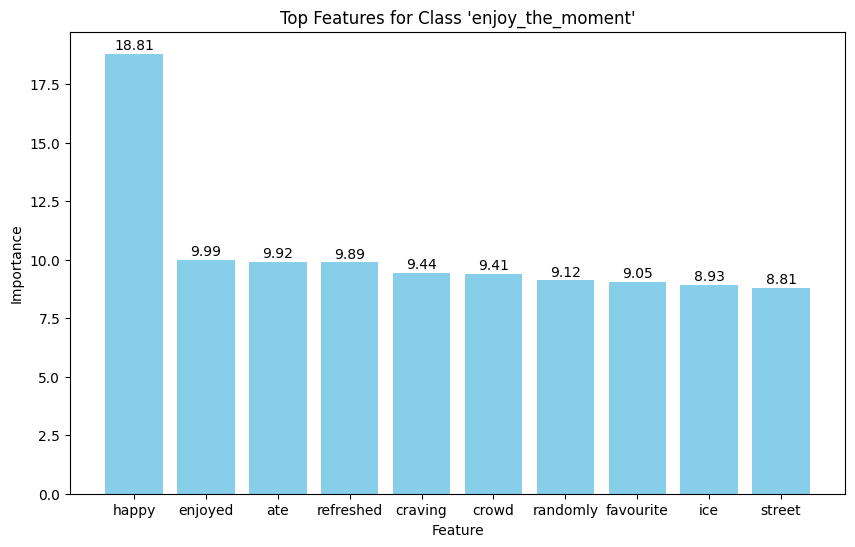

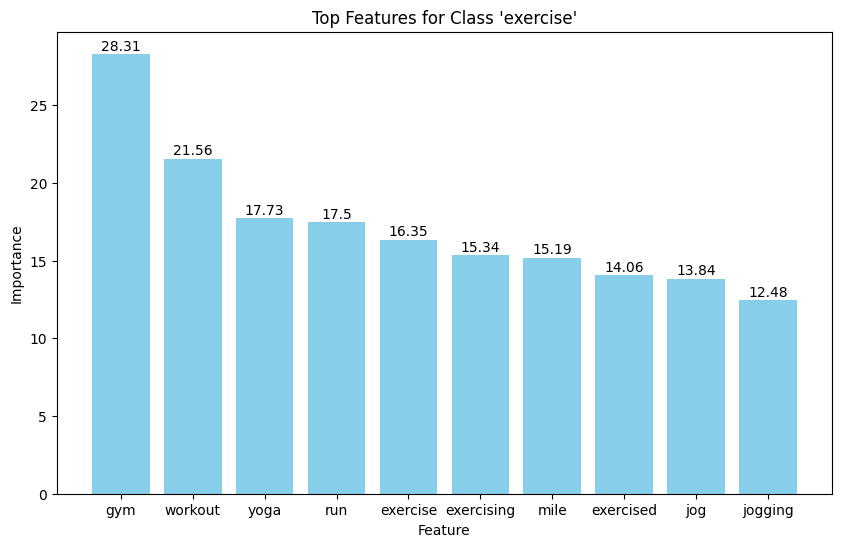

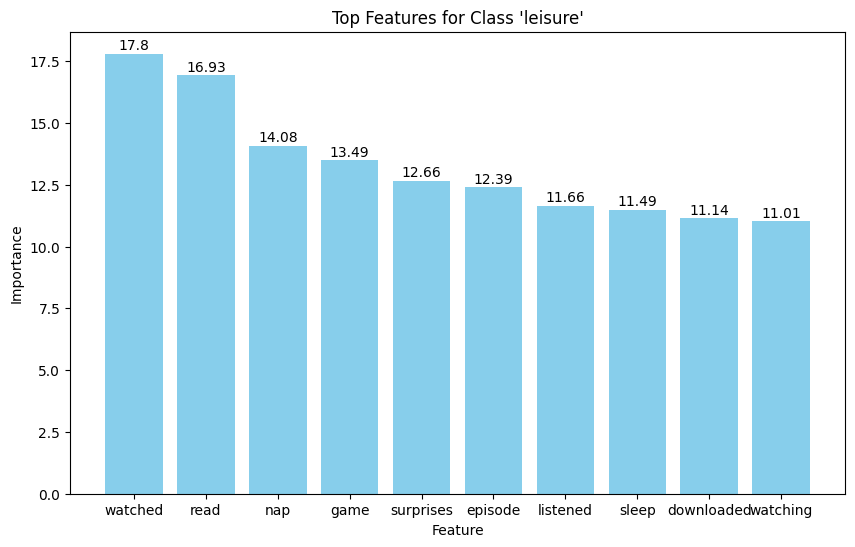

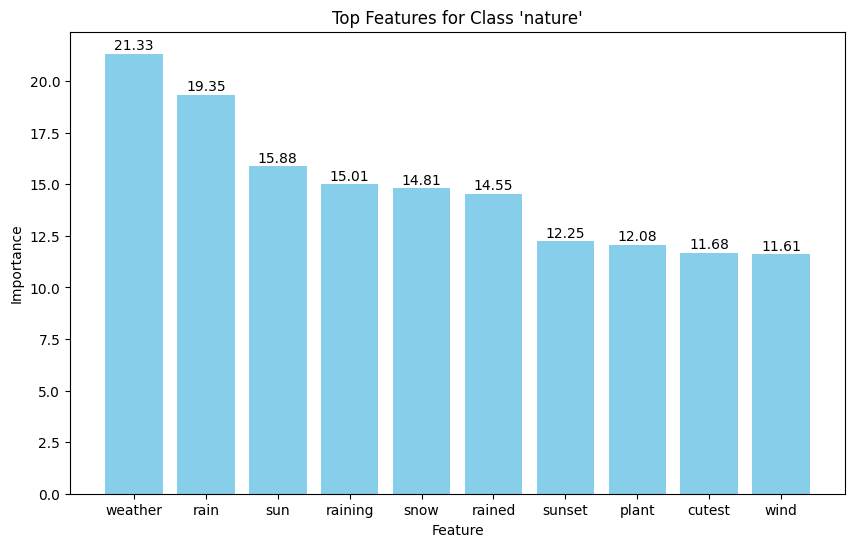

In [306]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = best_model.coef_

for class_index in range(7):
    class_coeffs = coefficients[class_index]
    sorted_indices = class_coeffs.argsort()[::-1]

    top_features = [(feature_names[i], class_coeffs[i]) for i in sorted_indices[:10]]
    class_name = index_to_class_name[class_index]
    features, importances = zip(*top_features)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(features, importances, color='skyblue') 

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f"Top Features for Class '{class_name}'")
    plt.show()




## Conclusion: The Mosaic of Happiness

As we conclude our journey through the dataset, what emerges is not just a series of findings, but a mosaic of human joy. Our exploration reveals the multifaceted nature of happiness – sometimes a quiet, introspective experience, at other times a loud, collective celebration. This story of happiness, drawn from the data, invites readers to reflect on their own moments of joy and recognize the diverse ways in which we all experience and share happiness.

In the end, this narrative isn't just about numbers or categories; it's a reminder of the shared human experience, a journey through the spectrum of joy that connects us all.